# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#read csv file a DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv).
*As per Knowledge article (https://knowledge.udacity.com/questions/675740), image-predictions.tsv file must be dowloaded programmatically*.

In [3]:
# download tweet image predictions using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = 'tweet_image_predictions'
filename = 'image-predictions.tsv'
# Make a directory for a file if doesn't already exist
if not os.path.exists(folder_name):
   os.makedirs(folder_name)

response = requests.get(url)
with open(folder_name + '/' + filename, 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv(folder_name + '/' + filename, sep='\t')
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
**Important**: txt file was downloaded manualy to the directory from project description page due to issues related to setting up developer Twitter account

In [4]:
# Read txt file line by line to dictionary

tweets_data = []

with open('tweet-json.txt') as file:

    for line in file:
        for line in file:
            try:
                tweet = json.loads(line)
                tweets_data.append(tweet)
            except:
                continue

In [5]:
# read to a Dataframe 
tweet_data = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))
tweet_data.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
1,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
2,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assesment
Get familiar with data (columns names, what it represents)

In [6]:
# Get familiar with data attributes
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [7]:
# Print randomn samples 
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None
881,760521673607086080,NaN,NaN,2016-08-02 17:04:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Doggo want what doggo cannot have. Temptation ...,NaN,NaN,NaN,https://vine.co/v/5ApKetxzmTB,12,10,None,doggo,None,None,None
44,883838122936631299,NaN,NaN,2017-07-09 00:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Noah. He can't believe someone made th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883838122...,12,10,Noah,None,None,None,None
1499,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a rare Arctic Wubberfloof. Unamused by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692187005...,12,10,a,None,None,None,None
1298,707741517457260545,NaN,NaN,2016-03-10 01:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your roommate eats your leftover Chili's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707741517...,10,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
1393,700029284593901568,NaN,NaN,2016-02-17 18:49:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. His ship is taking on water. So...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700029284...,10,10,Coops,None,None,None,None
1221,714485234495041536,NaN,NaN,2016-03-28 16:12:09 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Blitz. He screams. 10/10 (vid by @yeaa...,NaN,NaN,NaN,https://vine.co/v/iDrOvVqq0A6,10,10,Blitz,None,None,None,None


In [8]:
# Get familiar with data attributes
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [9]:
# Print randomn samples 
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
878,698355670425473025,https://pbs.twimg.com/media/CbEOxQXW0AEIYBu.jpg,1,pug,0.990191,True,Pekinese,0.002799,True,sunglasses,0.001310,False
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True
445,674646392044941312,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,1,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True
913,700864154249383937,https://pbs.twimg.com/media/Cbn4OqKWwAADGWt.jpg,1,kuvasz,0.805857,True,Great_Pyrenees,0.187272,True,Samoyed,0.003491,True
1732,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,malinois,0.203651,True,Irish_setter,0.091055,True
1191,739932936087216128,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,redbone,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True
146,668627278264475648,https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg,1,French_bulldog,0.965403,True,pug,0.008604,True,Boston_bull,0.008004,True
491,675534494439489536,https://pbs.twimg.com/media/CV_7CV6XIAEV05u.jpg,1,chow,0.749368,True,schipperke,0.133738,True,Newfoundland,0.049914,True
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False,European_gallinule,0.000030,False,agama,0.000022,False


In [10]:
# Get familiar with data attributes
tweet_data.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [11]:
# Print randomn samples
tweet_data.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
133,Mon May 22 00:28:40 +0000 2017,866450705531457537,866450705531457537,This is Jamesy. He gives a kiss to every other...,False,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 866450698984185856, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,32883,106827,False,False,False,False,en
427,Mon Jan 16 21:32:06 +0000 2017,821107785811234820,821107785811234820,Here's a doggo who looks like he's about to gi...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 821107776281669633, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,2487,10645,False,False,False,False,en
720,Mon Oct 03 23:25:55 +0000 2016,783085703974514689,783085703974514689,This is Earl. He can't catch. Did his best tho...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 783085675914461188, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,2565,9112,False,False,False,False,en
919,Thu Jul 21 23:53:04 +0000 2016,756275833623502848,756275833623502848,When ur older siblings get to play in the deep...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 756275824932876290, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,1738,7114,False,False,False,False,en
500,Sun Dec 25 18:00:17 +0000 2016,813081950185472002,813081950185472002,This is Baron. He's officially festive as h*ck...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 813081915272073216, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,3220,10989,False,False,False,False,en
1194,Mon Apr 04 15:22:08 +0000 2016,717009362452090881,717009362452090881,This is Smokey. He's having some sort of exist...,False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 717009356240384000, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,1102,3583,False,False,False,False,en
609,Fri Nov 11 19:55:50 +0000 2016,797165961484890113,797165961484890113,@JODYHiGHROLLER it may be an 11/10 but what do...,False,"[16, 55]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.971238e+17,...,None,None,False,32,256,False,False,NaN,NaN,en
1085,Wed Jun 01 02:00:04 +0000 2016,737826014890496000,737826014890496000,This is Remy. He has some long ass ears (proba...,False,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 737825997765107712, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,2006,5757,False,False,False,False,en
1164,Sun Apr 17 00:58:53 +0000 2016,721503162398597120,721503162398597120,This is Panda. He's happy af. 11/10 https://t....,False,"[0, 35]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 721503152168681472, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,2124,5086,False,False,False,False,en
229,Sat Apr 01 00:39:12 +0000 2017,847971574464610304,847971574464610304,RT @basic_vacek_: I love my new mug easy 13/10...,False,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 847970989635928064, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,482,0,False,False,False,False,en


### Programmatic assesment
Use info, describe, values_count methods

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive.describe()
twitter_archive[twitter_archive.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [14]:
twitter_archive.source.value_counts()
twitter_archive[twitter_archive.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
699,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
1834,676121918416756736,NaN,NaN,2015-12-13 19:30:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a very excited dog. Cle...,NaN,NaN,NaN,https://vine.co/v/iZXg7VpeDAv,8,10,None,None,None,None,None
1916,674307341513269249,NaN,NaN,2015-12-08 19:19:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is life-changing. 12/10 https://t.co/SroT...,NaN,NaN,NaN,https://vine.co/v/i7nWzrenw5h,12,10,life,None,None,None,None


In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [18]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2353 non-null   object 
 1   id                             2353 non-null   int64  
 2   id_str                         2353 non-null   object 
 3   full_text                      2353 non-null   object 
 4   truncated                      2353 non-null   bool   
 5   display_text_range             2353 non-null   object 
 6   entities                       2353 non-null   object 
 7   extended_entities              2072 non-null   object 
 8   source                         2353 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [19]:
sum(tweet_data.geo.isnull())

2353

In [20]:
# checking if there is a record of image prediction for a tweet record
#where source is "<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a> "
image_predictions[image_predictions.tweet_id == 802600418706604034]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality issues
**a. twitter_archive:**

    1. twitter_archive: in_reply_to_status_id, in_reply_to_user_id; retweeted_status_id; retweeted_status_user_id must be str instead of float since IDs.

    2. timestamp and retweeted_status_timestamp values should be datetime type not object/string.

    4. rating_denominator has incorrect values (> 10). --> check text message and use regex to retrieve digit caratters

    5. Columns contain null objects that are non-null (None to NaN).
    
    6. 'Name' column contains invalid names (None or length is <= 3).
    
    7. We only want original ratings (no retweets) that have images.
    
    
**b. image_predictions:**

    1. Some tweet_ids refer to the same image URLs (66 duplicative jpg_url)
    
    2. Missing values in image_predictions: only 2075 entries instead of 2356
    
    3. p2-p3 predictions and conf. level will be not relevant for master file 
    
    4. tweet_id in wrong format (must be str instead of int)
    
    
**c. tweet_data:**

    1. created_at contains date and time info --> should be ether:
    - splitted and have propper type (datetime, date but not object/string 
    - or checked with creation info in other tables - delete if already part of other tables info
   

### Tidiness issues
1. Dog stages in 'twitter_archive' should be combined in one column with respective values: doggo, floofer, pupper, puppo

2. Join 'tweet_info' and 'image_predictions' to 'twitter_archive'

3. Uninformative columns (all except from 1 record of the place are null) in 'tweet_data': geo, coordinates, place, contributors

4. In 'tweet_data' id_str duplicates id values in int format

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [6]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1:

#### Define:  replace None values with NaN in all 3 data sets

#### Code

In [7]:
table_list = [twitter_archive_clean, image_predictions_clean,tweet_data_clean]
for i in table_list: 
    i[i == 'None'] = np.nan

#### Test

In [8]:
twitter_archive_clean[twitter_archive_clean.doggo == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: change data type

#### Define:  twitter_archive table and image_predictions contain data in wrong format. Change formats: 
* restore correct ID values in in_reply_to_status_id, in_reply_to_user_id; retweeted_status_id; retweeted_status_user_id and convert to srt type to avoid integer overflow issues.
* timestamp and retweeted_status_timestamp values to datetime type.
* in image_predictions convert tweet_id from int to str format 

**Code**

In [9]:
#converting from float to int to get correct id and change type to str to avoid integer overflow issues.
col_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']


for col in col_list:
    #replacing with 0 to be able to change type to int first
    twitter_archive_clean[col].fillna(0, inplace=True) 
    twitter_archive_clean[col] = twitter_archive_clean[col].astype(int, copy=False).astype(str, copy=False)
    #replacing 0 with NaN
    twitter_archive_clean[col] = twitter_archive_clean[col].replace('0', np.nan)
    
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str, copy=False)


#covert to datetime type
twitter_archive_clean[['timestamp', 'retweeted_status_timestamp']] = twitter_archive_clean[
    ['timestamp','retweeted_status_timestamp']].astype('datetime64[ns]')

#convert tweet_id to str format
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str, copy=False)

**Test**

In [10]:
twitter_archive_clean.in_reply_to_status_id[30]

'886266357075128320'

In [11]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     object        
 2   in_reply_to_user_id         78 non-null     object        
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    object        
 7   retweeted_status_user_id    181 non-null    object        
 8   retweeted_status_timestamp  181 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [12]:
twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1313,706904523814649856,NaN,NaN,2016-03-07 18:09:06,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Ever seen a dog pet another dog? Both 13/10 tr...,NaN,NaN,NaT,https://vine.co/v/iXQAm5Lrgrh,13,10,NaN,NaN,NaN,NaN,NaN
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,872657584259551232,154767397,2017-06-08 03:32:35,https://twitter.com/loganamnosis/status/872657...,14,10,NaN,NaN,NaN,NaN,NaN
1968,673320132811366400,NaN,NaN,2015-12-06 01:56:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He's wearing blush. 11/10 rea...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,NaN,NaN,NaN,NaN


In [13]:
twitter_archive_clean['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: datetime64[ns]

In [14]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #3:
#### Define:  Dog stages in 'twitter_archive' should be melted in one column with respective values: doggo, floofer, pupper, puppo 

#### Code

In [15]:
# Select the columns to melt and to remain
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
keep_columns = [column for column in twitter_archive_clean.columns.tolist() if column not in melt_columns]

# Melt columns
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = keep_columns, 
                         var_name = 'stages', value_name = 'dog_stage')

# Delete dog_satge duplicates
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(
    'tweet_id', keep = 'first')

# Drop 'stages' column
twitter_archive_clean.drop(columns=['stages'], inplace = True)

#### Test

In [16]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 9 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     object        
 2   in_reply_to_user_id         78 non-null     object        
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    object        
 7   retweeted_status_user_id    181 non-null    object        
 8   retweeted_status_timestamp  181 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue #4:
#### Define:  combine 3 data sets in one

#### Code

In [17]:
# merge twitter_archive and tweet_data tables
twitter_combined = pd.merge(left=twitter_archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='id_str', how='inner')

#merge with image_preditcions table 
twitter_combined = pd.merge(left=twitter_combined, right=image_predictions_clean, 
                            left_on='tweet_id', right_on='tweet_id', how='inner')
twitter_combined.reset_index(inplace=True, drop=True)

#### Test

In [18]:
twitter_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tweet_id                       2072 non-null   object        
 1   in_reply_to_status_id_x        23 non-null     object        
 2   in_reply_to_user_id_x          23 non-null     object        
 3   timestamp                      2072 non-null   datetime64[ns]
 4   source_x                       2072 non-null   object        
 5   text                           2072 non-null   object        
 6   retweeted_status_id            79 non-null     object        
 7   retweeted_status_user_id       79 non-null     object        
 8   retweeted_status_timestamp     79 non-null     datetime64[ns]
 9   expanded_urls                  2072 non-null   object        
 10  rating_numerator               2072 non-null   int64         
 11  rating_denominato

### Issue #5:

#### Define: drop duplicative and non informative (empty) columnns

#### Code

In [19]:
# drop duplicative and non informative (empty) columnns 
drop_list = ['id', 'id_str', 'created_at', 'source_y', 'in_reply_to_status_id_y', 'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
            'in_reply_to_user_id_str', 'in_reply_to_screen_name','geo', 'coordinates', 'place', 'contributors', 
            'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' ]

twitter_combined.drop(columns = drop_list, inplace=True)

#### Test

In [20]:
twitter_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tweet_id                       2072 non-null   object        
 1   in_reply_to_status_id_x        23 non-null     object        
 2   in_reply_to_user_id_x          23 non-null     object        
 3   timestamp                      2072 non-null   datetime64[ns]
 4   source_x                       2072 non-null   object        
 5   text                           2072 non-null   object        
 6   retweeted_status_id            79 non-null     object        
 7   retweeted_status_user_id       79 non-null     object        
 8   retweeted_status_timestamp     79 non-null     datetime64[ns]
 9   expanded_urls                  2072 non-null   object        
 10  rating_numerator               2072 non-null   int64         
 11  rating_denominato

### Issue #6:

#### Define:  we are interested in original tweets with pictures: 
* Delete entries that are not original tweets but re-tweets: delete data entries where "retweeted_status_*" is populated
* Delete tweet data entries with no pictures

As per https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. This attribute contains a representation of the original Tweet that was retweeted.

#### Code

In [21]:
#select rows where "retweeted_status_id" is not Null and delete them from the table
twitter_combined.drop(twitter_combined[twitter_combined['retweeted_status_id'].notnull()].index, inplace=True)

#drop columns about retweet details (retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp)

twitter_combined.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)
twitter_combined.reset_index(inplace=True, drop=True)

#### Test

In [22]:
twitter_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tweet_id                       1993 non-null   object        
 1   in_reply_to_status_id_x        23 non-null     object        
 2   in_reply_to_user_id_x          23 non-null     object        
 3   timestamp                      1993 non-null   datetime64[ns]
 4   source_x                       1993 non-null   object        
 5   text                           1993 non-null   object        
 6   expanded_urls                  1993 non-null   object        
 7   rating_numerator               1993 non-null   int64         
 8   rating_denominator             1993 non-null   int64         
 9   name                           1447 non-null   object        
 10  dog_stage                      306 non-null    object        
 11  full_text        

In [23]:
#check that each tweet data entry has at least 1 picture
twitter_combined[twitter_combined['img_num'] == 0]

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,jpg_url,img_num,p1,p1_conf,p1_dog


### Issue #7:

#### Define: Some denominator values can be >10, however if numerator is bigger than denominator it should be fine. Hence first retrieve ratinng info from tweet texts by using regex (since some values are missing), then check if there is demonimator values > numinator values , afterwards bring to common denominnator so it can be used in further analysis.


#### Code


In [24]:
# extract rating from tweet texts 
test = pd.Series(twitter_combined.text)
rating = test.str.extract(r'(\d+[/]\d+)')
twitter_combined['rating'] = rating

#slit extracted ratinng info by '/' and update numerator, denominator info
twitter_combined['rating_numerator'], twitter_combined['rating_denominator'] = twitter_combined.rating.str.split('/',1).str
twitter_combined = twitter_combined.drop('rating', axis=1)

<ipython-input-24-28a15a4bcd61>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  twitter_combined['rating_numerator'], twitter_combined['rating_denominator'] = twitter_combined.rating.str.split('/',1).str


In [25]:
#convert numenator to int and replace missing with NaN
numerator = []

for row in range(0,len(twitter_combined)):
    x = twitter_combined.rating_numerator[row]
    try: 
        value = int(x)
        numerator.append(value)
    except: 
        print('exception' + str(row))
        numerator.append(np.nan)
        
        
#convert denominator to int and replace missing with NaN
denominator = []

for row in range(0,len(twitter_combined)):
    x = twitter_combined.rating_denominator[row]
    try: 
        value = int(x)
        denominator.append(value)
    except: 
        print('exception' + str(row))
        denominator.append(np.nan)

In [26]:
#replace in twitter_combined dataframe
twitter_combined.rating_numerator = numerator
twitter_combined.rating_denominator = denominator

In [27]:
#brinng to common denominator to be able to analyse and compare going forward
twitter_combined['rating'] = twitter_combined.rating_numerator / twitter_combined.rating_denominator

#### Test

In [28]:
twitter_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tweet_id                       1993 non-null   object        
 1   in_reply_to_status_id_x        23 non-null     object        
 2   in_reply_to_user_id_x          23 non-null     object        
 3   timestamp                      1993 non-null   datetime64[ns]
 4   source_x                       1993 non-null   object        
 5   text                           1993 non-null   object        
 6   expanded_urls                  1993 non-null   object        
 7   rating_numerator               1993 non-null   int64         
 8   rating_denominator             1993 non-null   int64         
 9   name                           1447 non-null   object        
 10  dog_stage                      306 non-null    object        
 11  full_text        

In [29]:
twitter_combined.rating.sample(20)

1193    1.1
604     1.2
1082    1.2
1327    0.9
1352    1.1
1439    0.5
1931    1.2
1084    1.0
893     1.2
959     1.2
70      1.3
1287    0.5
257     1.0
1185    0.6
1819    1.0
1136    1.2
170     1.2
1237    0.8
511     1.2
1862    0.4
Name: rating, dtype: float64

### Issue #8:

#### Define: clean dog names 'a' by replacinng with np.nan
#### Code

In [30]:
twitter_combined[twitter_combined.name == 'a'] = np.nan

#### Test

In [31]:
twitter_combined.name.value_counts()

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Penny       9
           ..
Devón       1
Lacy        1
Snoop       1
Dotsy       1
Huck        1
Name: name, Length: 934, dtype: int64

In [32]:
twitter_combined[twitter_combined.name == 'a'].index

Int64Index([], dtype='int64')

### Issue #9:
#### Define: retrieve dogs gender from text columns and make it category type

#### Code

In [33]:
#check if any combination of pronouns that represents gender exists in the text, 
#assigns male or female gender accordingly and append the result to a list

male = ['he', 'him', 'his', "he's", 'himself', 'brother', 'brothers']
female = ['she', 'her', 'hers', "she's", 'herself', 'sister', 'sisters']

dog_gender = []
found = False 

for tweet in twitter_combined.text:
    found = False
    text = str(tweet).lower().split()
    # Male
    for pronoun in male: 
        for i in range(0,len(text)):
            if pronoun == text[i]:
                dog_gender.append('male')
                found = True
                break
        if found:
            break
    # Female
    if not found:
        for pronoun in female: 
            for i in range(0,len(text)):
                if pronoun == text[i]:
                    dog_gender.append('female')
                    found = True
                    break
            if found:
                break
            else:
                dog_gender.append(np.nan)
                break
        

In [34]:
print(set(dog_gender))


{nan, 'female', 'male'}


In [35]:
twitter_combined['dog_gender'] = dog_gender

#### Test

In [36]:
twitter_combined.dog_gender.value_counts()


male      1001
female     169
Name: dog_gender, dtype: int64

### Clean data types

In [37]:
twitter_combined.dog_stage = twitter_combined.dog_stage.astype('category', copy=False)
twitter_combined.dog_gender = twitter_combined.dog_gender.astype('category', copy=False)

#### Test

In [38]:
twitter_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tweet_id                       1938 non-null   object        
 1   in_reply_to_status_id_x        23 non-null     object        
 2   in_reply_to_user_id_x          23 non-null     object        
 3   timestamp                      1938 non-null   datetime64[ns]
 4   source_x                       1938 non-null   object        
 5   text                           1938 non-null   object        
 6   expanded_urls                  1938 non-null   object        
 7   rating_numerator               1938 non-null   float64       
 8   rating_denominator             1938 non-null   float64       
 9   name                           1392 non-null   object        
 10  dog_stage                      302 non-null    category      
 11  full_text        

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
twitter_combined.to_csv('./twitter_archive_master.csv', encoding = 'utf-8', index=False)
                             

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [40]:
df = twitter_combined.copy()
df['count'] = 1
# check simple stats per dog_stage 
df.groupby(by='dog_stage', dropna=True).mean()

,rating_numerator,rating_denominator,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted,img_num,p1_conf,p1_dog,rating,count
dog_stage,,,,,,,,,,,,,
doggo,11.783784,10.0,0.0,0.0,6868.905405,18881.932432,0.0,0.0,1.256757,0.601791,0.783784,1.178378,1
floofer,12.000000,10.0,0.0,0.0,4968.714286,13206.000000,0.0,0.0,1.142857,0.609204,1.000000,1.200000,1
pupper,10.688442,10.0,0.0,0.0,2310.432161,7029.447236,0.0,0.0,1.256281,0.608191,0.703518,1.068844,1
puppo,12.000000,10.0,0.0,0.0,6473.954545,21582.090909,0.0,0.0,1.454545,0.722293,0.863636,1.200000,1


In [41]:
# max retweets per dog_stage
df.groupby(by='dog_stage', dropna=True, sort=True).retweet_count.sum()

dog_stage
doggo      508299.0
floofer     34781.0
pupper     459776.0
puppo      142427.0
Name: retweet_count, dtype: float64

In [42]:
# 5 most popular dog names 
names = df.groupby(by='name', as_index=False).count().sort_values(by='count', ascending=False)[:5]
top5names = names[['name', 'count']].reset_index(drop=True)
top5names


,name,count
0,Charlie,11
1,Oliver,10
2,Cooper,10
3,Lucy,10
4,Penny,9


In [43]:
# most common dog breed
breed = df.groupby(by='p1', as_index=False).count().sort_values(by='count', ascending=False)[:5]
top5breeds = breed[['p1', 'count']].reset_index(drop=True).rename(columns={'p1':'breed'})
top5breeds

,breed,count
0,golden_retriever,138
1,Labrador_retriever,94
2,Pembroke,85
3,Chihuahua,77
4,pug,53


In [44]:
# 5 most popular names per top 5 breeds
name_per_breed = pd.DataFrame()

top5breed_list=list(top5breeds.breed)
names_list = []
for breed in top5breed_list:
    names = list(df[df.p1 == breed].groupby(by='name', as_index=False).count().sort_values(
    by='count', ascending=False).reset_index(drop=True)[:5].name)
    names_list.append(names)


In [45]:
names_list

[['Lucy', 'Peaches', 'Zeke', 'Bella', 'Winnie'],
 ['Sadie', 'very', 'Charlie', 'Cooper', 'Beau'],
 ['Cassie', 'Nelly', 'Ellie', 'Chester', 'Stanley'],
 ['Penny', 'Archie', 'Charlie', 'Finn', 'Alexanderson'],
 ['Bob', 'Amber', 'Samsom', 'Ozzy', 'Pepper']]

In [46]:
# check rating among top 5 dog breed
df.rating.describe() # checking rating info

ratings = df.groupby(by='p1')['rating_numerator'].describe().nlargest(5,'count')
ratings = ratings[['count','mean']].sort_values(by='mean', ascending=False)
ratings

,count,mean
p1,,
Labrador_retriever,94.0,13.968085
golden_retriever,138.0,13.224638
Pembroke,85.0,11.541176
Chihuahua,77.0,10.753247
pug,53.0,10.245283


In [47]:
# check sesonality of tweets and retweets
df['weekday'] = np.nan
df['month'] = np.nan

for i in range(0, len(df)):
    df.loc[i, 'weekday'] = pd.Timestamp(df.timestamp[i]).day_name()
    df.loc[i, 'month'] = pd.Timestamp(df.timestamp[i]).month_name()
    
# number of tweets per weekday
tweet_per_weekday = df.groupby(by='weekday', as_index=False)['count'].count()

#sort by weekday
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

tweet_per_weekday['weekday'] = pd.Categorical(tweet_per_weekday['weekday'], categories=cats, ordered=True)

tweet_per_weekday = tweet_per_weekday.sort_values('weekday').reset_index(drop=True)
tweet_per_weekday

,weekday,count
0,Monday,317
1,Tuesday,287
2,Wednesday,287
3,Thursday,280
4,Friday,274
5,Saturday,246
6,Sunday,247


In [48]:
# retweet count per tweets made on weekday
retweet_per_weekday = df.groupby(by=['weekday'], as_index=False)['retweet_count'].sum().sort_values(
    by='retweet_count', ascending=False).reset_index(drop=True)

#sort by weekday 
retweet_per_weekday['weekday'] = pd.Categorical(retweet_per_weekday['weekday'], categories=cats, ordered=True)
retweet_per_weekday = retweet_per_weekday.sort_values('weekday').reset_index(drop=True)
retweet_per_weekday

,weekday,retweet_count
0,Monday,853252.0
1,Tuesday,790210.0
2,Wednesday,906541.0
3,Thursday,716784.0
4,Friday,779633.0
5,Saturday,746190.0
6,Sunday,658405.0


In [49]:
# merge tweet_per_weekday and retweet_per_weekday
tweet_retweet_df = pd.merge(left=tweet_per_weekday, right=retweet_per_weekday, left_on='weekday', 
                right_on='weekday', how='inner')

tweet_retweet_df

,weekday,count,retweet_count
0,Monday,317,853252.0
1,Tuesday,287,790210.0
2,Wednesday,287,906541.0
3,Thursday,280,716784.0
4,Friday,274,779633.0
5,Saturday,246,746190.0
6,Sunday,247,658405.0


### Insights:
1. Most retweets per dog stage: According to data tweets with pupper dog stage on average have lower rating and lower retweet count compare to other dog stages. Max number of retweets falls on doggo, closely followed by pupper.

2. Top 5 most popular dog names within tweets: Charlie, Oliver, Cooper, Lucy, Penny.

3. Most popular dog breed in tweets is golden retriever.

4. Original tweets are mostly posted on Monday-Wednesday and users are less active over weekend. Despite people are most activly posting on Mondays, users mostly retweeting tweets that are posted on Wednesdays.


### Visualization

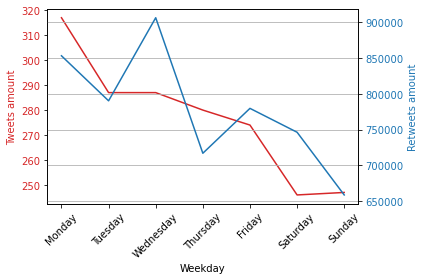

In [90]:
import matplotlib.pyplot as plt
if not os.path.exists('pictures'):
   os.makedirs('pictures')

# Create some mock data
t = list(tweet_retweet_df.weekday)
data1 = list(tweet_retweet_df['count'])
data2 = list(tweet_retweet_df.retweet_count)


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Weekday')
plt.xticks(rotation = 45)
ax1.set_ylabel('Tweets amount', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Retweets amount', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.savefig('pictures/tweet_sesonality.png', dpi=500)
plt.show()

<ipython-input-92-4b4b7642e722>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().yaxis.grid()


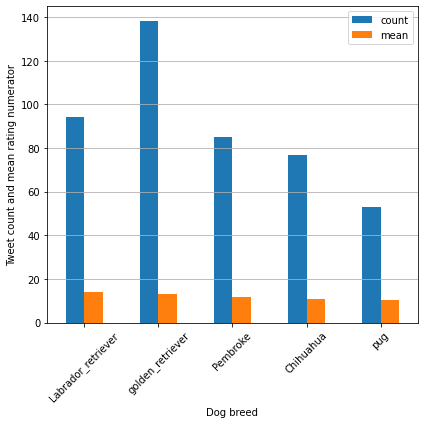

In [92]:
# print top 5 dog breeds and mean rating numenator

ratings.plot(kind='bar',figsize= [6,6])
plt.xlabel('Dog breed')
plt.ylabel('Tweet count and mean rating numerator')
plt.axes().yaxis.grid()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('pictures/dog_breed_vs_rating_numenator.png', dpi=500)
plt.show()